# Проект: Обучение с учителем: качество модели

## Вводная часть

### Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. 

***ЗАДАЧА :***  разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

### Описание данных

**Четыре датасета:**

Данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении - **market_file.csv**
- **id** — номер покупателя в корпоративной базе данных.
- **Покупательская активность** — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- **Тип сервиса** — уровень сервиса, например «премиум» и «стандарт».
- **Разрешить сообщать** — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- **Маркет_актив_6_мес** — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- **Маркет_актив_тек_мес** — количество маркетинговых коммуникаций в текущем месяце.
- **Длительность** — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- **Акционные_покупки** — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- **Популярная_категория** — самая популярная категория товаров у покупателя за последние 6 месяцев.
- **Средний_просмотр_категорий_за_визит** — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- **Неоплаченные_продукты_штук_квартал** — общее число неоплаченных товаров в корзине за последние 3 месяца.
- **Ошибка_сервиса** — число сбоев, которые коснулись покупателя во время посещения сайта.
- **Страниц_за_визит** — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


Данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом - **market_money.csv**
- **id** — номер покупателя в корпоративной базе данных.
- **Период** — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- **Выручка** — сумма выручки за период.


Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода - **market_time.csv**
- **id** — номер покупателя в корпоративной базе данных.
- **Период** — название периода, во время которого зафиксировано общее время.
- **минут** — значение времени, проведённого на сайте, в минутах.



Данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю - **money.csv**
- **id** — номер покупателя в корпоративной базе данных.
- **Прибыль** — значение прибыли.



### Цель проекта

1. Разработать модель, которая предскажет вероятность снижения покупательской активности.

2. Выделить сегмент покупателей, проанализировать его и предложить, как увеличить его покупательскую активность. 

### План проекта

1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение таблиц
5. Корреляционный анализ
6. Использование пайплайнов
7. Анализ важности признаков
8. Сегментация покупателей
9. Общий вывод

## Загрузка данных

### Импорт библиотек

In [1]:
!pip install shap 
!pip install phik
!pip install -U scikit-learn
!pip install matplotlib==3.3.4

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import shap

from phik import phik_matrix
from phik.report import plot_correlation_matrix

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler, 
    LabelEncoder
)
from sklearn.impute import SimpleImputer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

In [3]:
RANDOM_STATE = 42

### Общая информация о данных

#### Данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении - market_file.csv

In [4]:
market_file = pd.read_csv('/datasets/market_file.csv')
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [5]:
market_file.shape[0]

1300

In [6]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

**ВЫВОД:**

1. Датафрейм содержит 1300 строки;
2. Названия столбцов оставим кириллическими.;
3. Пропусков нет;
4. Тип данных в столбцах указаны корректно.

#### Данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом - market_money.csv

In [7]:
market_money = pd.read_csv('/datasets/market_money.csv')
market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [8]:
market_money.shape[0]

3900

In [9]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


**ВЫВОД:**

1. Датафрейм содержит 3900 строк;
2. Названия столбцов оставим кириллическими.;
3. Пропусков нет;
4. Тип данных в столбцах указаны корректно.

#### Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода - market_time.csv

In [10]:
market_time = pd.read_csv('/datasets/market_time.csv')
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [11]:
market_time.shape[0]

2600

In [12]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


**ВЫВОД:**

1. Датафрейм содержит 2600 строк;
2. Названия столбцов оставим кириллическими.;
3. Пропусков нет;
4. Тип данных в столбцах указаны корректно.

#### Данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю - money.csv

In [13]:
money = pd.read_csv('/datasets/money.csv', sep = ';', decimal = ',')
money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [14]:
money.shape[0]

1300

In [15]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


**ВЫВОД:**

1. Датафрейм содержит 1300 строк;
2. Названия столбцов оставим кириллическими.;
3. Пропусков нет;
4. Тип данных в столбцах указаны корректно.

## Предобработка данных

### Проверка на дубликаты

#### Проверка на явные дубликаты

In [16]:
def obv_duplicates(df):
    result1 = df.duplicated().sum()
    df_new = df.drop_duplicates()
    result2 = df_new.shape[0]
    print(f'Количество явных дубликатов в датафрейме: {result1}\nКоличество строк после удаления явных дубликтов: {result2}')
    return df_new

In [17]:
market_file = obv_duplicates(market_file)

Количество явных дубликатов в датафрейме: 0
Количество строк после удаления явных дубликтов: 1300


In [18]:
market_money = obv_duplicates(market_money)

Количество явных дубликатов в датафрейме: 0
Количество строк после удаления явных дубликтов: 3900


In [19]:
market_time = obv_duplicates(market_time)

Количество явных дубликатов в датафрейме: 0
Количество строк после удаления явных дубликтов: 2600


In [20]:
money = obv_duplicates(money)

Количество явных дубликатов в датафрейме: 0
Количество строк после удаления явных дубликтов: 1300


#### Проверка на неявные дубликаты

Проверим столбцы с текстовыми значениями:

In [21]:
df_columns = ['Покупательская активность', 'Тип сервиса', 'Популярная_категория']

for i in df_columns:
    print(market_file[i].value_counts(),'\n')

Прежний уровень    802
Снизилась          498
Name: Покупательская активность, dtype: int64 

стандарт     914
премиум      376
стандартт     10
Name: Тип сервиса, dtype: int64 

Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: Популярная_категория, dtype: int64 



В столбце ***Тип сервиса*** обнаружены неявные дубликаты. Исправим написание значений в столбцах.

In [22]:
market_file['Тип сервиса'] = market_file['Тип сервиса'].replace('стандартт', 'стандарт')

In [23]:
market_file['Тип сервиса'].value_counts()

стандарт    924
премиум     376
Name: Тип сервиса, dtype: int64

In [24]:
market_money['Период'].value_counts()

предыдущий_месяц       1300
препредыдущий_месяц    1300
текущий_месяц          1300
Name: Период, dtype: int64

In [25]:
market_time['Период'].value_counts()

предыдцщий_месяц    1300
текущий_месяц       1300
Name: Период, dtype: int64

В столбце ***Период*** опечатка. Исправим написание значений в столбцах.

In [26]:
market_time['Период'] = market_time['Период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

In [27]:
market_time['Период'].value_counts()

предыдущий_месяц    1300
текущий_месяц       1300
Name: Период, dtype: int64

**ВЫВОД:**

1. Явных дубликатов в датафреймах не обнаружено;
2. Неявные дубликаты в столбце ***Тип сервиса*** (market_file) исправлены;
3. В столбце ***Период*** (market_time) опечатка исправлена.

**ВЫВОД ПО ПРЕДОБРАБОТКЕ ДАННЫХ:**


- Названия столбцов оставлены кириллическими;

- Проведена проверка на явные дубликаты: 

      Явные дубликаты отсутствуют

- Проведена проверка на неявные дубликаты:  

      Неявные дубликаты в столбце Тип сервиса (market_file) исправлены
      В столбце Период (market_time) опечатка исправлена
  
- Пропусков нет;

- Типы данных в столбцах указаны корректно.

## Исследовательский анализ данных

Отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

In [28]:
no_act = market_money.loc[market_money['Выручка'] == 0, 'id'].unique()
no_act

array([215348, 215357, 215359])

In [29]:
market_file = market_file.loc[~market_file['id'].isin(no_act), :]
market_money = market_money.loc[~market_money['id'].isin(no_act), :]
market_time = market_time.loc[~market_time['id'].isin(no_act), :]
money = money[~money['id'].isin(no_act)]

***Данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении (market_file):***

In [30]:
market_file.describe()

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000
mean,215998.986893,4.254433,4.009252,602.993832,0.320547,3.267540,2.841172,4.184271,8.186584
std,374.578554,1.015618,0.696048,249.101456,0.249657,1.354623,1.973451,1.950973,3.977061
min,215349.000000,0.900000,3.000000,121.000000,0.110000,1.000000,0.000000,0.000000,1.000000
25%,215675.000000,3.700000,4.000000,410.000000,0.170000,2.000000,1.000000,3.000000,5.000000
50%,215999.000000,4.200000,4.000000,607.000000,0.240000,3.000000,3.000000,4.000000,8.000000
75%,216323.000000,4.900000,4.000000,806.000000,0.300000,4.000000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.000000,10.000000,9.000000,20.000000


Построим графики для каждого признака.

In [31]:
columns_col = ['Маркет_актив_6_мес', 
               'Длительность',
               'Акционные_покупки']

name_col = ['Маркетинговая активность компании за 6 месяцев', 
            'Количество дней с момента регистрации на сайте', 
            'Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев']

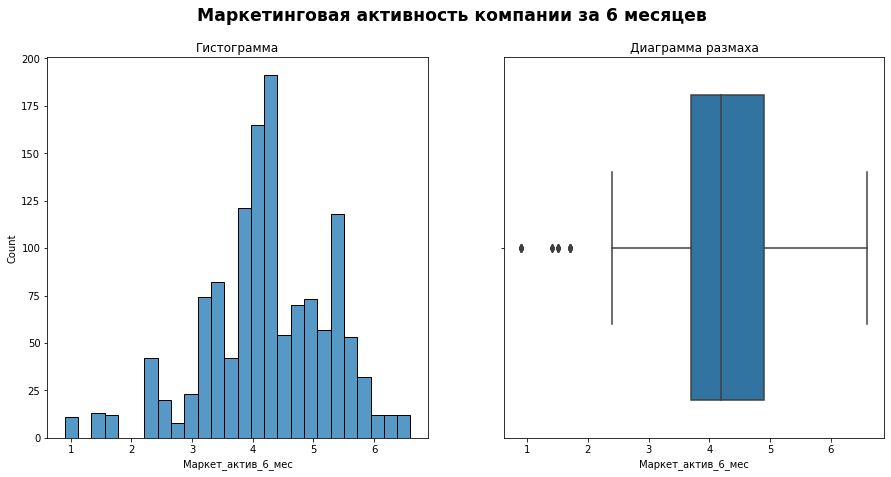

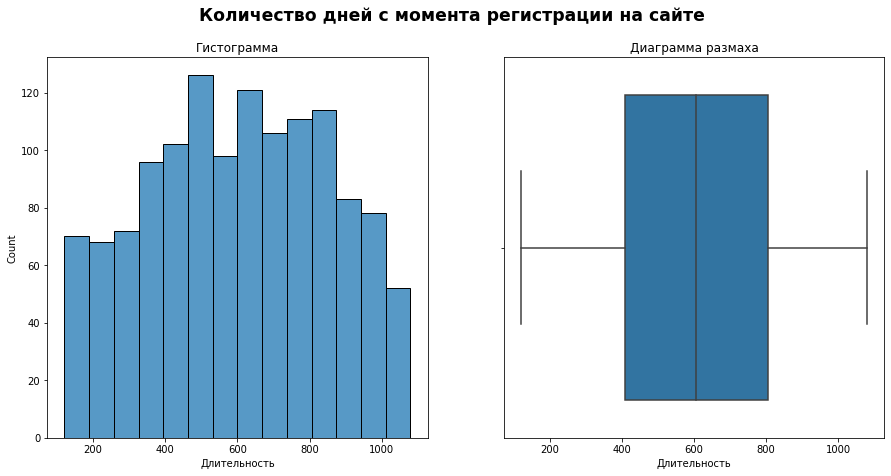

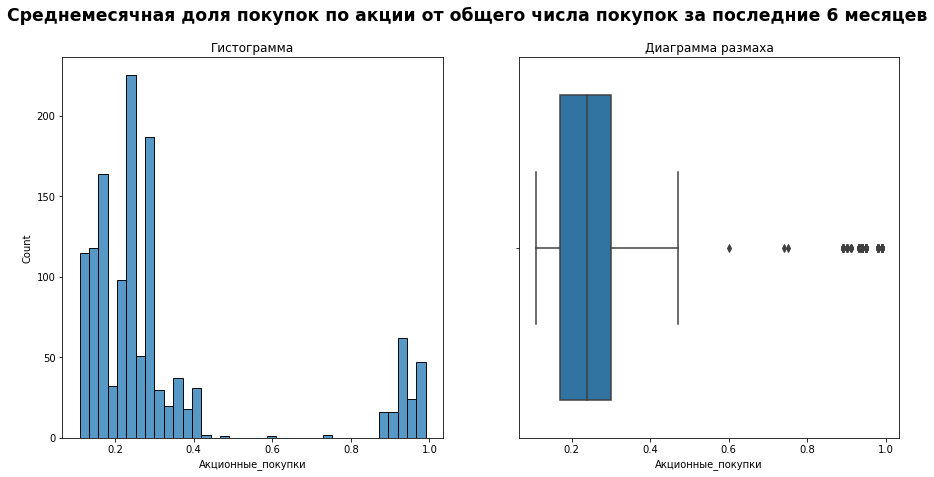

In [32]:
for i, j in zip(columns_col, name_col):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (15,7))
    
    sns.histplot(data = market_file, x = i, ax=axs[0])
    axs[0].set_title('Гистограмма')
    
    sns.boxplot(data = market_file, x = i, ax=axs[1])
    axs[1].set_title('Диаграмма размаха')
    
    fig.suptitle(j, fontsize = 'xx-large', fontweight = 600)
    plt.show()

In [33]:
columns_cat = ['Маркет_актив_тек_мес', 
               'Средний_просмотр_категорий_за_визит', 
               'Неоплаченные_продукты_штук_квартал',
               'Ошибка_сервиса', 
               'Страниц_за_визит']

name_cat = ['Маркетинговая активность компании за текущий месяц',
            'Количество просмотренных покупателем категорий за визит в течение последнего месяца', 
            'Общее число неоплаченных товаров в корзине за последние 3 месяца', 
            'Число сбоев, которые коснулись покупателя во время посещения сайта', 
            'Среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца']

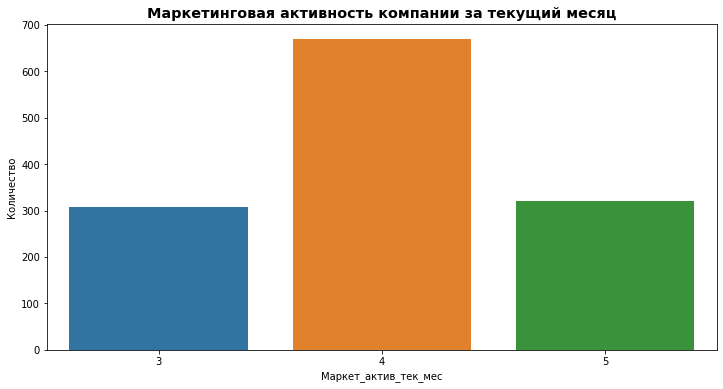

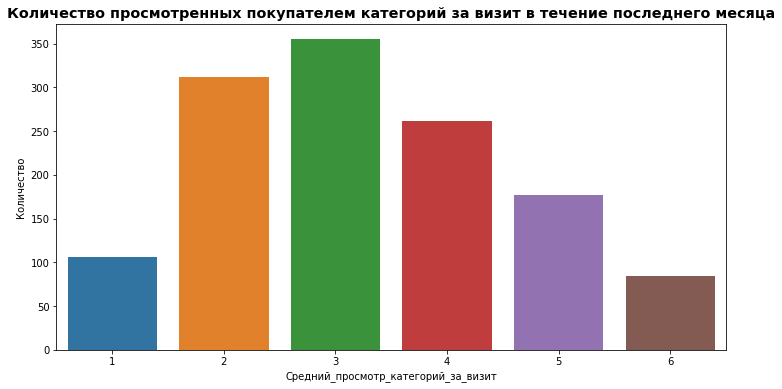

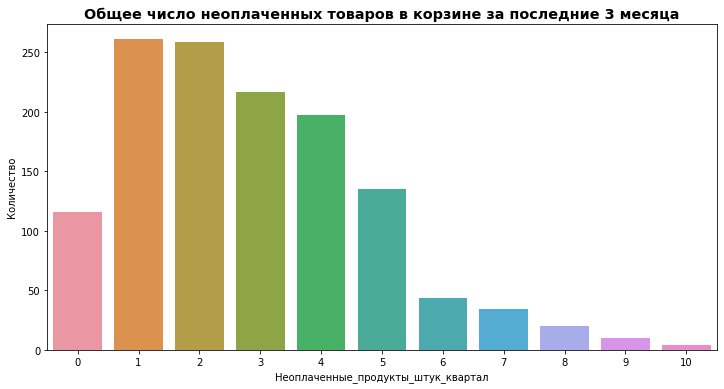

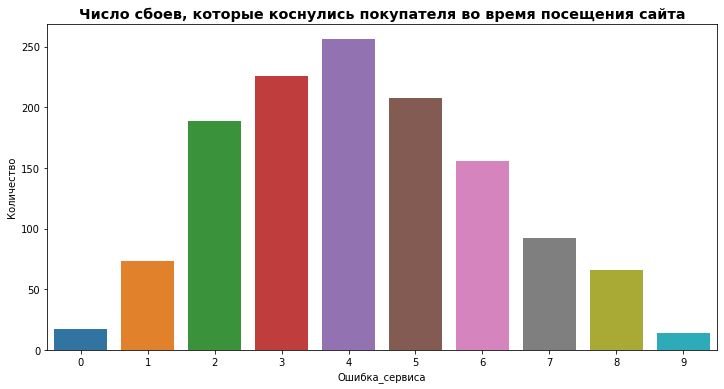

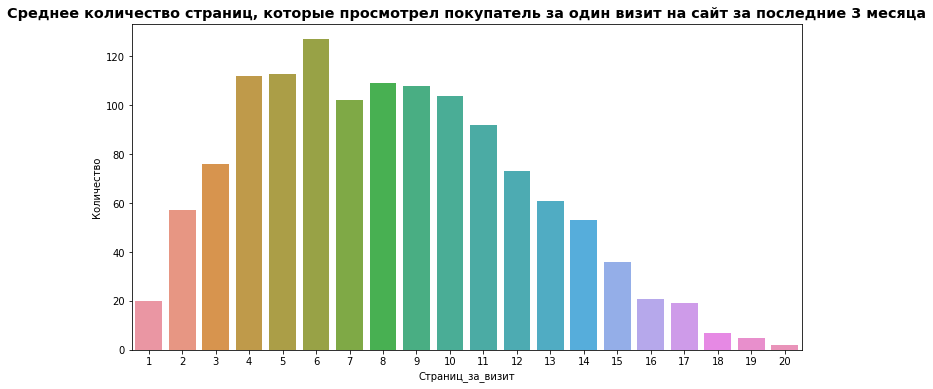

In [34]:
for i, j in zip(columns_cat, name_cat):
    plt.subplots(figsize = (12,6))
    sns.countplot(data = market_file, x = i)
    plt.ylabel('Количество')
    plt.title(j, fontsize = 'x-large', fontweight = 600)
    plt.show()

**ВЫВОД:**
- Маркетинговая активность компании за 6 месяцев на уровне 3.7 - 4.9. Медианное значение 4.2. Есть 4 выброса. Но это не аномальные значения. Оставим их в датафрейме.
- Маркетинговая активность компании за текущий месяц - 4.0.
- Количество дней с момента регистрации на сайте на уровне 410 - 806. Медианное значение 607. Выбросов нет.
- Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев на уровне 0.17 - 0.30. Медианное значение 0.24. Выбросы есть. Однако, это могут быть покупатели, которых интересовал исключительно акционный товар.
- Количество просмотренных покупателем категорий за визит в течение последнего месяца 2 - 4. Чаще просматривают 3 категории.
- Общее число неоплаченных товаров в корзине за последние 3 месяца 1 - 3. Чаще не оплачены 1-2 товара.
- Число сбоев, которые коснулись покупателя во время посещения сайта на уровне - 4.
- Среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца 5 - 11. Медианное значение 8.


In [35]:
columns_cat = ['Покупательская активность', 'Тип сервиса', 'Разрешить сообщать', 'Популярная_категория']

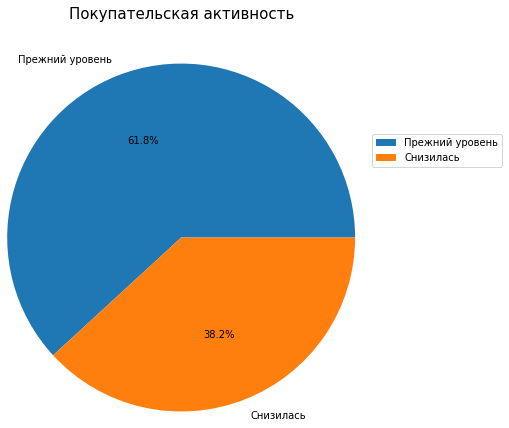

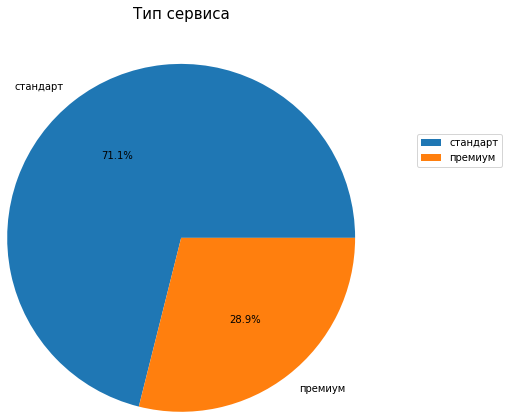

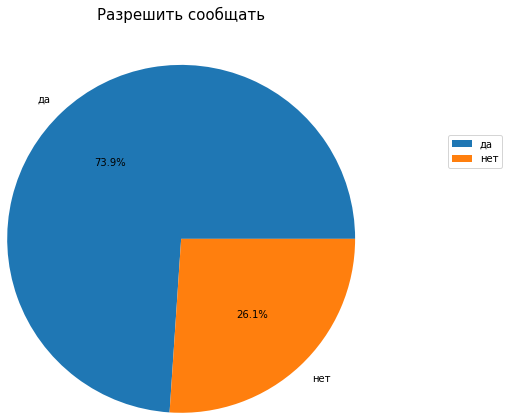

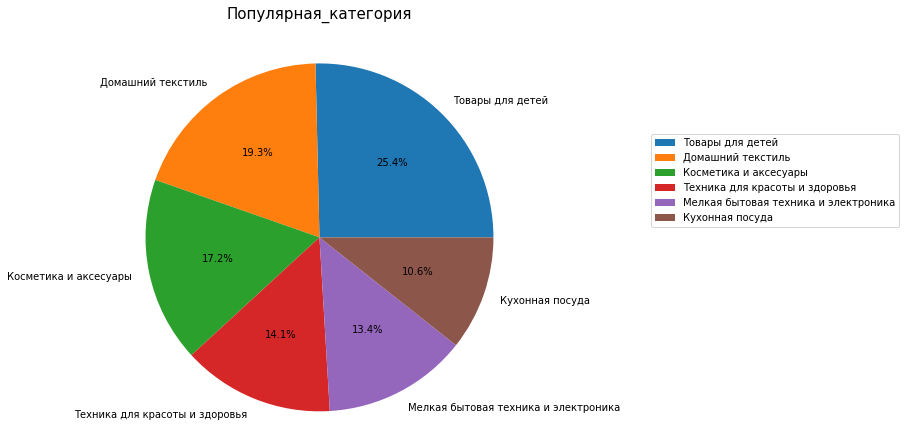

In [36]:
for i in columns_cat:
    market_file[i].value_counts().plot(y = 'count', kind = 'pie', radius = 2, autopct='%1.1f%%')
    plt.title(i, fontsize=15, pad=110)
    plt.legend(bbox_to_anchor=(2,1))
    plt.ylabel(' ')
    plt.show()

**ВЫВОД:**

- Покупательская активность снизилась у 38.2% клиентов.
- Тип сервиса: стандарт 71.1 %, премиум 28.9 %.
- Согласие на получение информации о дополнительных предложениях о товарах дали 73,9% покупателей.
- Наиболее популярные категории - детские товары (25.4%), домашний текстиль (19.3%). Наименее популярна - кухонная посуда (10.6%)


***Данные о выручке, которую получает магазин с покупателя (market_money)***

In [37]:
market_money.describe()

,id,Выручка
count,3891.000000,3891.000000
mean,215998.986893,5033.718890
std,374.482249,1768.471286
min,215349.000000,2758.700000
25%,215675.000000,4592.000000
50%,215999.000000,4959.000000
75%,216323.000000,5363.200000
max,216647.000000,106862.200000


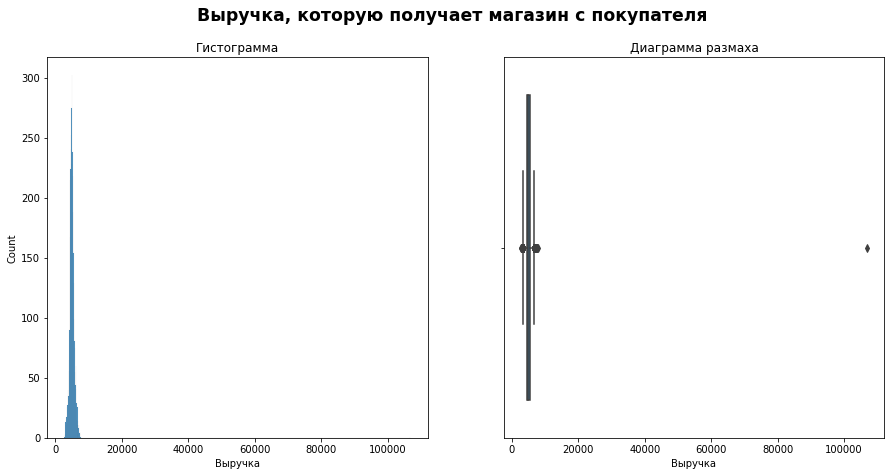

In [38]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (15,7))
    
sns.histplot(data = market_money, x = 'Выручка', ax=axs[0])
axs[0].set_title('Гистограмма')
    
sns.boxplot(data = market_money, x = 'Выручка', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
    
fig.suptitle('Выручка, которую получает магазин с покупателя', fontsize = 'xx-large', fontweight = 600)
plt.show()

Обнаружен выброс. Значение 106862.2. Удалим его.

In [39]:
market_money = market_money[market_money['Выручка']<= 20000]

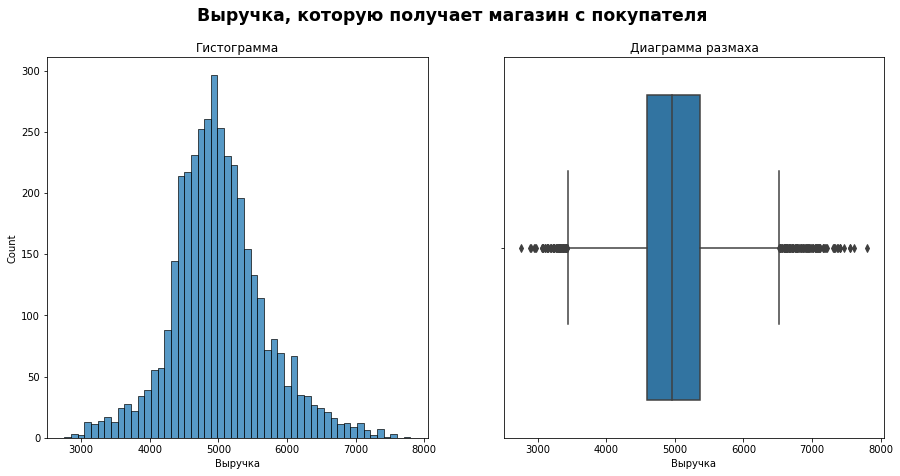

In [40]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (15,7))
    
sns.histplot(data = market_money, x = 'Выручка', ax=axs[0])
axs[0].set_title('Гистограмма')
    
sns.boxplot(data = market_money, x = 'Выручка', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
    
fig.suptitle('Выручка, которую получает магазин с покупателя', fontsize = 'xx-large', fontweight = 600)
plt.show()

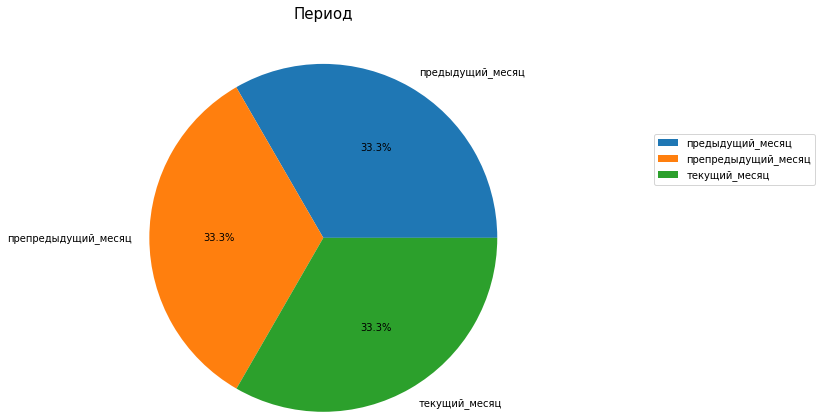

In [41]:
market_money['Период'].value_counts().plot(y = 'count', kind = 'pie', radius = 2, autopct='%1.1f%%')
plt.title('Период', fontsize=15, pad=110)
plt.legend(bbox_to_anchor=(2,1))
plt.ylabel(' ')
plt.show()

**ВЫВОД:**

- Выручка, которую получает магазин с покупателя на уровне 4592 - 5363. Медианное значение 4959. Обнаружено аномально высокое значение 106862.2. Выброс удален.
- Выручка в течение 3 месяцев зафиксирована в равных долях (33.3%).


***Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода (market_time):***

In [42]:
market_time.describe()

,id,минут
count,2594.000000,2594.000000
mean,215998.986893,13.340401
std,374.506318,4.081999
min,215349.000000,4.000000
25%,215675.000000,10.000000
50%,215999.000000,13.000000
75%,216323.000000,16.000000
max,216647.000000,23.000000


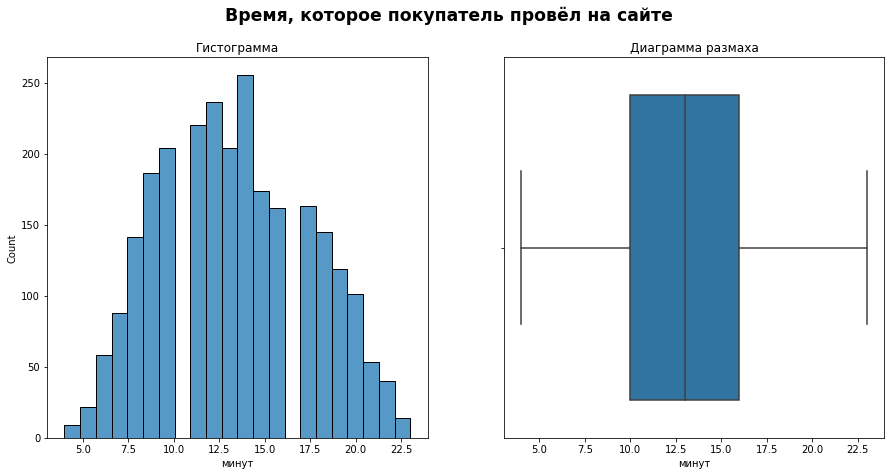

In [43]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (15,7))
    
sns.histplot(data = market_time, x = 'минут', ax=axs[0])
axs[0].set_title('Гистограмма')
    
sns.boxplot(data = market_time, x = 'минут', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
    
fig.suptitle('Время, которое покупатель провёл на сайте ', fontsize = 'xx-large', fontweight = 600)
plt.show()

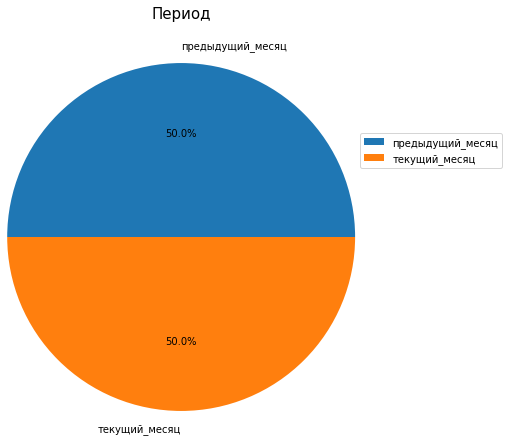

In [44]:
market_time['Период'].value_counts().plot(y = 'count', kind = 'pie', radius = 2, autopct='%1.1f%%')
plt.title('Период', fontsize=15, pad=110)
plt.legend(bbox_to_anchor=(2,1))
plt.ylabel(' ')
plt.show()

**ВЫВОД:**

- Время, которое покупательпровел на сайте 10 - 16 минут. Медианное значение 13. Выбросов нет.
- Время в текущем и предыдущем периодах распределено в равных долях (50%).

***Данные о среднемесячной прибыли покупателя за последние 3 месяца (money)***

In [45]:
money.describe()

,id,Прибыль
count,1297.000000,1297.000000
mean,215998.986893,3.997610
std,374.578554,1.010813
min,215349.000000,0.860000
25%,215675.000000,3.300000
50%,215999.000000,4.040000
75%,216323.000000,4.670000
max,216647.000000,7.430000


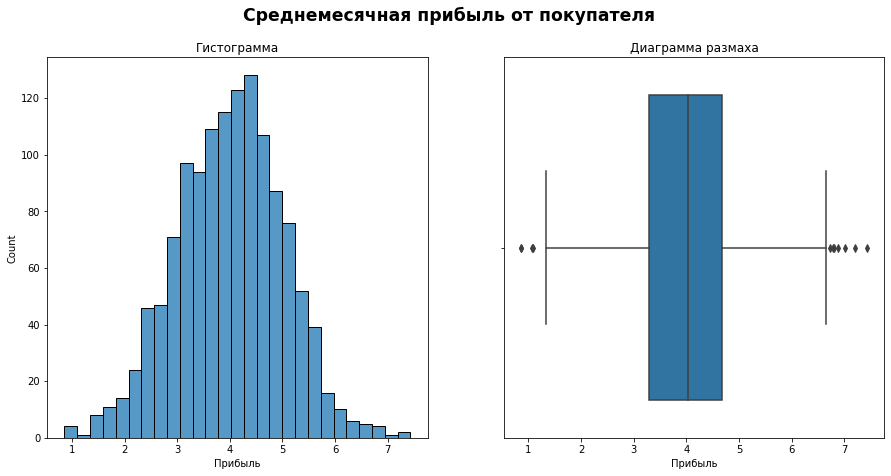

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (15,7))
    
sns.histplot(data = money, x = 'Прибыль', ax=axs[0])
axs[0].set_title('Гистограмма')
    
sns.boxplot(data = money, x = 'Прибыль', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
    
fig.suptitle('Среднемесячная прибыль от покупателя ', fontsize = 'xx-large', fontweight = 600)
plt.show()

**ВЫВОД:**

- Среднемесячная прибыль от покупателя 3.3 - 4.67. Медианное значение 4.04. 

**ВЫВОД ПО ИССЛЕДОВАТЕЛЬСКОМУ АНАЛИЗУ ДАННЫХ:**

***Данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении (market_file):***
- Маркетинговая активность компании за 6 месяцев на уровне 3.7 - 4.9. Медианное значение 4.2. Есть 4 выброса. Но это не аномальные значения. Оставим их в датафрейме.
- Маркетинговая активность компании за текущий месяц - 4.0. Выбросов нет.
- Количество дней с момента регистрации на сайте на уровне 410 - 806. Медианное значение 607. Выбросов нет.
- Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев на уровне 0.17 - 0.30. Медианное значение 0.24. Выбросы есть. Однако, это могут быть покупатели, которых интересовал исключительно акционный товар.
- Количество просмотренных покупателем категорий за визит в течение последнего месяца 2 - 4. Медианное значение 3. Выбросов нет.
- Общее число неоплаченных товаров в корзине за последние 3 месяца 1 - 3. Медианное значение 3. Есть 2 выброса. Оставим без изменений.
- Число сбоев, которые коснулись покупателя во время посещения сайта на уровне 3 - 6. Медианное значение 4. Выбросов нет.
- Среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца 5 - 11. Медианное значение 8. Выбросов нет.


- Покупательская активность снизилась у 38.2% клиентов.
- Тип сервиса: стандарт 71.1 %, премиум 28.9 %.
- Согласие на получение информации о дополнительных предложениях о товарах дали 73,9% покупателей.
- Наиболее популярные категории - детские товары (25.4%), домашний текстиль (19.3%). Наименее популярна - кухонная посуда (10.6%)

***Данные о выручке, которую получает магазин с покупателя (market_money):***
- Выручка, которую получает магазин с покупателя на уровне 4592 - 5363. Медианное значение 4959. Обнаружено аномально высокое значение 106862.2. Выброс удален.
- Выручка в течение 3 месяцев зафиксирована в равных долях (33.3%).

***Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода (market_time):***
- Время, которое покупательпровел на сайте 10 - 16 минут. Медианное значение 13. Выбросов нет.
- Время в текущем и предыдущем периодах распределено в равных долях (50%).

***Данные о среднемесячной прибыли покупателя за последние 3 месяца (money)***
- Среднемесячная прибыль от покупателя 3.3 - 4.67. Медианное значение 4.04. 

## Объединение таблиц

Объединим таблицы market_file, market_money, market_time. 
Учтем, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. 
В итоговой таблице сделаем отдельный столбец для каждого периода.

In [47]:
market_money_uni = market_money.pivot_table(index='id',
                                            columns='Период', 
                                            values='Выручка', 
                                            aggfunc='first').reset_index()
market_money_uni = market_money_uni.rename(columns=
                                           {'id': 'id',
                                            'предыдущий_месяц': 'Выручка_предыдущий_месяц',
                                            'препредыдущий_месяц': 'Выручка_препредыдущий_месяц',
                                            'текущий_месяц': 'Выручка_текущий_месяц'}
                                          )

In [48]:
market_money_uni.head()

Период,id,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц
0,215349,5216.0,4472.0,4971.6
1,215350,5457.5,4826.0,5058.4
2,215351,6158.0,4793.0,6610.4
3,215352,5807.5,4594.0,5872.5
4,215353,4738.5,5124.0,5388.5


In [49]:
market_time_uni = market_time.pivot_table(index='id',
                                              columns='Период', 
                                              values='минут',
                                              aggfunc='first').reset_index()
market_time_uni = market_time_uni.rename(columns=
                                         {'id': 'id', 
                                          'предыдущий_месяц': 'минут_предыдущий_месяц', 
                                          'текущий_месяц': 'минут_текущий_месяц'}
                                        )

In [50]:
market_time_uni.head()

Период,id,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,12,10
1,215350,8,13
2,215351,11,13
3,215352,8,11
4,215353,10,10


In [51]:
market_uni_money_time = pd.merge(market_money_uni, 
                                 market_time_uni, 
                                 left_index=True, 
                                 right_index=True).drop('id_y', axis = 1)

In [52]:
market_uni_money_time.head()

Период,id_x,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,5216.0,4472.0,4971.6,12,10
1,215350,5457.5,4826.0,5058.4,8,13
2,215351,6158.0,4793.0,6610.4,11,13
3,215352,5807.5,4594.0,5872.5,8,11
4,215353,4738.5,5124.0,5388.5,10,10


In [53]:
market_uni = pd.merge(market_file, 
                      market_uni_money_time,
                      left_index=True, 
                      right_index=True).drop('id_x', axis = 1)

In [54]:
market_uni.set_index('id', inplace=True)
market_uni = market_uni.dropna()

In [55]:
market_uni.shape[0]

1293

In [56]:
market_uni.head()

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5457.5,4826.0,5058.4,8,13
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,6158.0,4793.0,6610.4,11,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,5807.5,4594.0,5872.5,8,11
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4738.5,5124.0,5388.5,10,10
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5685.0,4503.0,5869.6,11,12


## Корреляционный анализ

In [57]:
interval_cols = ['Маркет_актив_6_мес', 
                 'Длительность', 
                 'Акционные_покупки', 
                 'Выручка_препредыдущий_месяц', 
                 'Выручка_предыдущий_месяц', 
                 'Выручка_текущий_месяц']

In [58]:
phik_overview = phik_matrix(market_uni, interval_cols=interval_cols)

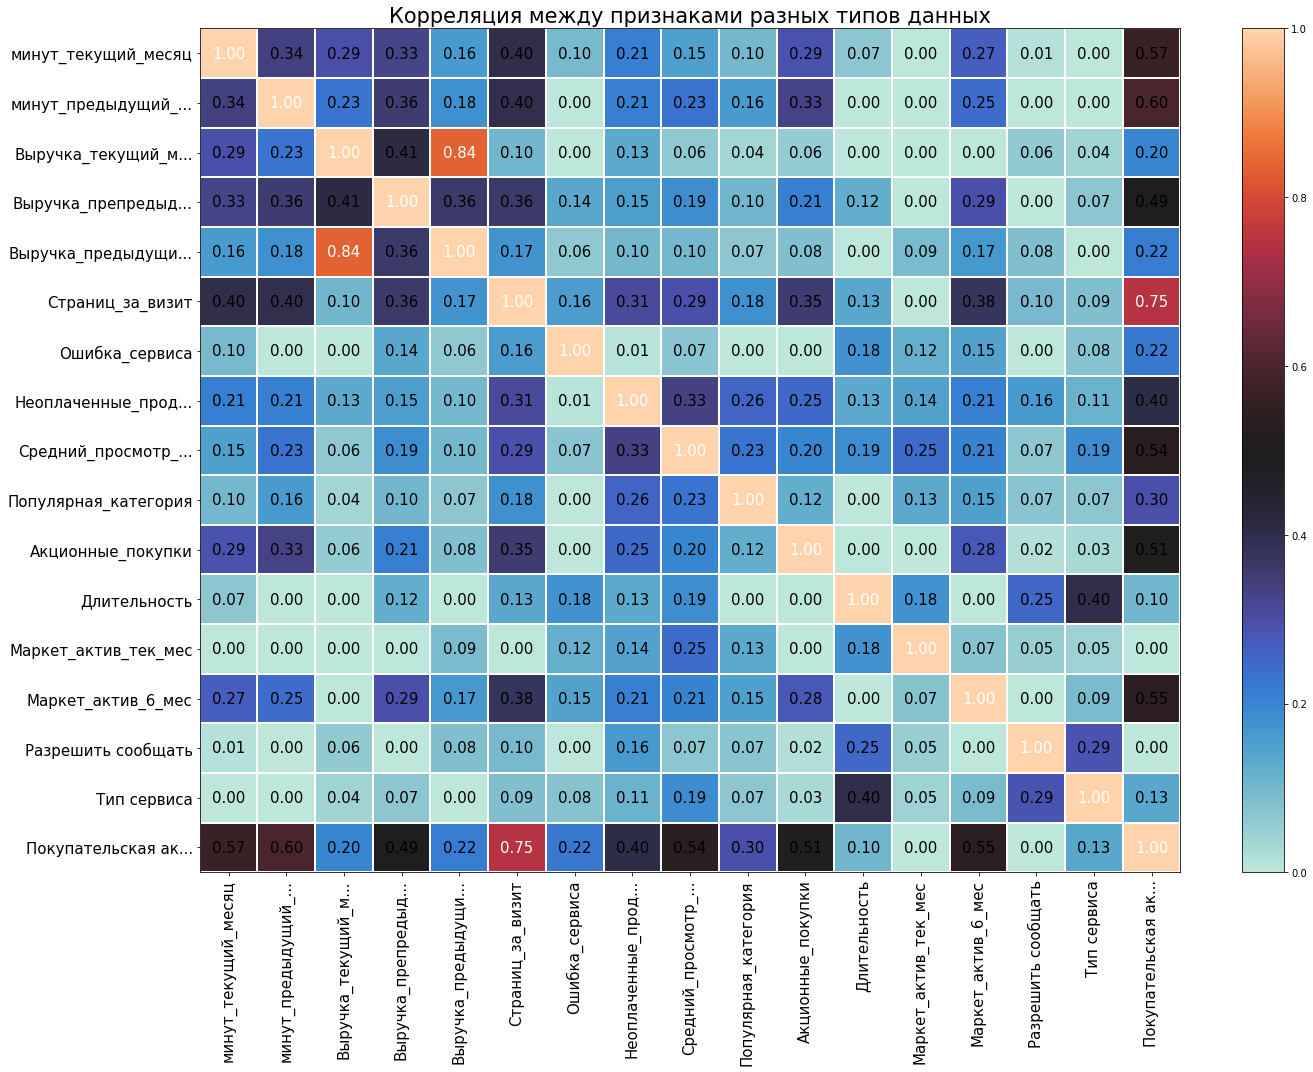

In [59]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='icefire',
    title=r'Корреляция между признаками разных типов данных',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 


**ВЫВОД:**

- Высокие коэффициенты корреляции между признаками покупательской активности и количеством просмотренных страниц за визит (0.75), а так же выручкой за текущий и предыдущий период (0.84);
- Мультиколлинеарность между входными признаками не наблюдается, т.к. значения коэффициента корреляции от 0.9 до 0.95 по модулю отсутствуют.


## Использование пайплайнов

Целевой признак: 
- Покупательская активность


Входные признаки:
- Разрешить сообщать 
- Популярная_категория
- Тип сервиса
- Маркет_актив_6_мес
- Маркет_актив_тек_мес
- Длительность 
- Акционные_покупки 
- Средний_просмотр_категорий_за_визит
- Неоплаченные_продукты_штук_квартал
- Ошибка_сервиса
- Страниц_за_визит 
- Выручка_препредыдущий_месяц
- Выручка_предыдущий_месяц
- Выручка_текущий_месяц
- минут_предыдущий_месяц
- минут_текущий_месяц

In [60]:
market_uni.head()

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5457.5,4826.0,5058.4,8,13
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,6158.0,4793.0,6610.4,11,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,5807.5,4594.0,5872.5,8,11
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4738.5,5124.0,5388.5,10,10
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5685.0,4503.0,5869.6,11,12


Количественные и категориальные признаки обработаем в пайплайне раздельно.

In [61]:
ohe_columns = ['Популярная_категория']
ord_columns = ['Тип сервиса', 'Разрешить сообщать']

In [62]:
num_columns = [
    'Маркет_актив_6_мес',
    'Маркет_актив_тек_мес',
    'Длительность', 
    'Акционные_покупки', 
    'Средний_просмотр_категорий_за_визит',
    'Неоплаченные_продукты_штук_квартал',
    'Ошибка_сервиса',
    'Страниц_за_визит', 
    'Выручка_препредыдущий_месяц',
    'Выручка_предыдущий_месяц',
    'Выручка_текущий_месяц' ,
    'минут_предыдущий_месяц', 
    'минут_текущий_месяц'
]

Разделим данные на входные и целевые. Разобъем на тренировочную и тестовую выборки.

In [63]:
y = market_uni['Покупательская активность']
X = market_uni.drop(['Покупательская активность'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, stratify=y) 

Переведём строковые значения целевого признака в порядковые числа. 

In [64]:
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

Добавляем OneHotEncoder-кодирование в пайплайн

Если в данных есть пропуски, заполним их самым часто встречающимся значением с помощью SimpleImputer. 

Кодируем данные с помощью OneHotEncoder.

Объединим шаги в пайплайн и назовём его — ohe_pipe.

In [65]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
) 

Добавляем Ordinal-кодирование в пайплайн

Заполним пропуски самым часто встречающимся значением с помощью SimpleImputer. 

Проводим Ordinal-кодирование с помощью OrdinalEncoder. 

Заполним пропуски, которые появляются после Ordinal-кодирования. 

Объединим все действия в пайплайн и назовём его ord_pipe:

In [66]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[['премиум', 'стандарт'],['да', 'нет']], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
) 

Объединим кодирование и масштабирование в один пайплайн с подготовкой данных.А так же укажем, к каким данным какие операции применять.


- Применяем пайплайн ohe_pipe к данным ohe_columns, которые требуют OHE-кодирования. Это шаг ohe.

- Применяем пайплайн ord_pipe к данным ord_columns, которые требуют Ordinal-кодирования. Это шаг ord.

- Масштабируем данные num_columns. Это шаг num.

Применим инструмент ColumnTransformer — он объединит операции по подготовке данных. В нашей задаче это кодирование и масштабирование. 

In [67]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

Создадим итоговый пайплайн для обучения четырех моделей. 

In [68]:
pipe_final= Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

Создадим словари с моделями  KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression(), SVC(), их гиперпараметрами и методами масштабирования.

In [69]:
param_distributions = [
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
    
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
   
    {
        'models': [SVC(random_state=RANDOM_STATE, probability= True)],
        'models__C': range(2, 17),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    },
    
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
] 

In [70]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

Используем метрику roc_auc, так как с её помощью можно оценить качество работы модели учитывая все возможные пороговые значения, кроме того эта метрикаустойчива к несбалансированным классам.

In [71]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['Популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImpu...
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__C': range(2, 17),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(random_state=42)],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [72]:
print('Метрика roc_auc для лучшей модели:\n', randomized_search.best_score_)
print('\nЛучшая модель и её параметры:\n\n', randomized_search.best_estimator_) 

Метрика roc_auc для лучшей модели:
 0.9067259065788477

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Популярная_категория']),
                                                 ('ord',
                                                  

In [73]:
best_model = randomized_search.best_estimator_
randomized_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(stra...
                                                   'Маркет_актив_тек_мес',
                                                   'Длительность',
                                                   'Акционные_покупки',
                                                   'Средний_просмотр_категорий_за_визит',
                                                   'Неоплаченные_продукты_штук_квартал',
                                                   'Ошибка_сервиса',
                                                   'Страниц_за_визит',
                                                   'Выручка_препредыдущий_месяц',
                                                   'Выручка_предыдущий_месяц',
                                                   'Выручка_текущий_месяц',
                                                   'минут_предыдущий_месяц',
                                                   'минут_текущий_месяц'])])),
                ('models', LogisticRegression(C=3, random_state=42))])

Рассчитаем прогноз на тестовых данных:

In [74]:
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

In [75]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.9022983870967741

**ВЫВОД:**

- Лучшая модель LogisticRegression 
- Метрика ROC-AUC 0,90

## Анализ важности признаков

Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP

In [76]:
X_train_new = pd.DataFrame(
    pipe_final.named_steps['preprocessor'].fit_transform(X_train), 
    columns= pipe_final.named_steps['preprocessor'].get_feature_names_out()
)
X_test_new = pd.DataFrame(
    pipe_final.named_steps['preprocessor'].transform(X_test), 
    columns= pipe_final.named_steps['preprocessor'].get_feature_names_out()
)

In [77]:
model = LogisticRegression(random_state=42)
model = model.fit(X_train_new, y_train)

In [78]:
explainer = shap.LinearExplainer(model, X_test_new)
shap_values = explainer(X_test_new)

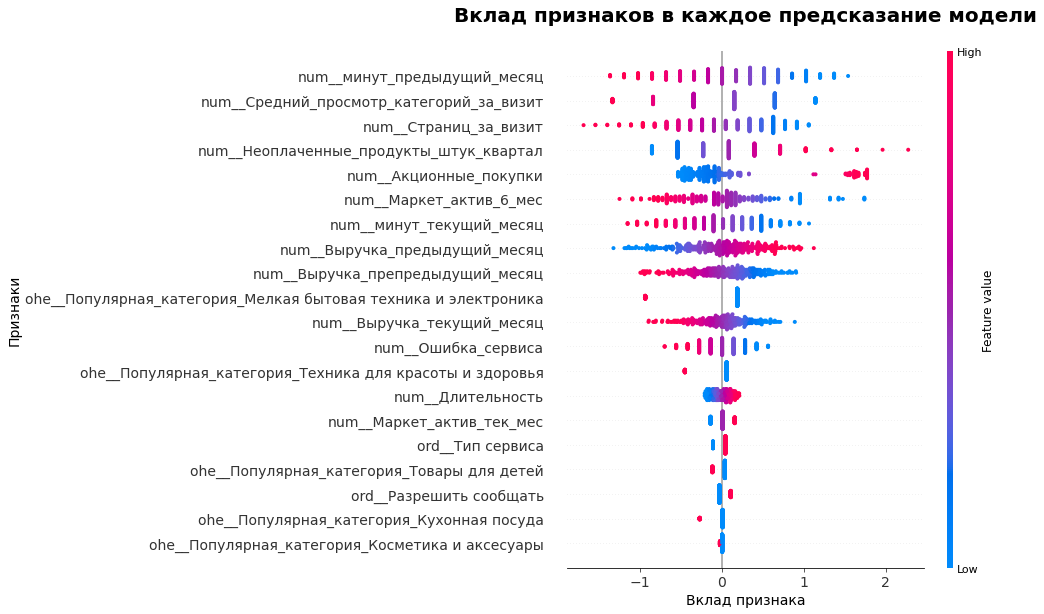

In [79]:
shap.plots.beeswarm(shap_values, max_display=30, show=False)

fig, ax = plt.gcf(), plt.gca()

ax.tick_params(labelsize=14)
ax.set_xlabel('Вклад признака', fontsize=14)
ax.set_ylabel('Признаки', fontsize=14)
ax.set_title('Вклад признаков в каждое предсказание модели', fontsize=20, fontweight = 600, pad = 30)

plt.show()

**ВЫВОД:**

- Признаки "Маркет_актив_тек_мес", "Тип сервиса", "Разрешить сообщать" мало значимы для модели;
- Признаки "минут_предыдущий_месяц", "Средний_просмотр_категорий_за_визит", "Страниц_за_визит" сильнее всего влияют на целевой признак;
- Эти наблюдения можно использовать при моделировании и принятии бизнес-решений: увеличить количество просмотренных страниц магазина добавив блоки «Похожие товары» и «С этим товаром также покупают», добавить блоки с популярными товарами, стимулировать переходы на другие страницы, использовать контекстную рекламу, проводить акции, розыгрыши и конкурсы.

## Сегментация покупателей

Выполним сегментацию покупателей. Добавим к датафрейму результаты моделирования и данные о прибыльности покупателей.

In [80]:
market_uni['Вероятность_снижения_активности'] = best_model.predict_proba(market_uni)[:, 1]
market_uni['Предсказанная_активность'] = best_model.predict(market_uni)

In [81]:
market_uni = market_uni.merge(market_money, on='id', how='inner')

In [82]:
market_uni.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,...,Страниц_за_визит,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,Вероятность_снижения_активности,Предсказанная_активность,Период,Выручка
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,...,5,5457.5,4826.0,5058.4,8,13,0.939023,1,препредыдущий_месяц,4472.0
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,...,5,5457.5,4826.0,5058.4,8,13,0.939023,1,текущий_месяц,4971.6
2,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,...,5,5457.5,4826.0,5058.4,8,13,0.939023,1,предыдущий_месяц,5216.0
3,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,...,5,6158.0,4793.0,6610.4,11,13,0.378724,0,препредыдущий_месяц,4826.0
4,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,...,5,6158.0,4793.0,6610.4,11,13,0.378724,0,текущий_месяц,5058.4


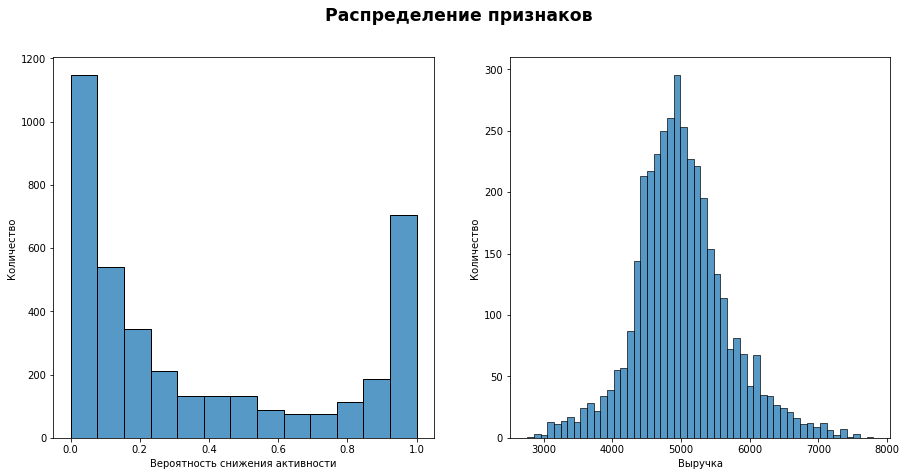

In [83]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (15,7))

   
sns.histplot(data = market_uni, x = 'Вероятность_снижения_активности', ax=axs[0])
axs[0].set_xlabel('Вероятность снижения активности')
axs[0].set_ylabel('Количество')
    
sns.histplot(data = market_uni, x = 'Выручка', ax=axs[1])
axs[1].set_xlabel('Выручка')
axs[1].set_ylabel('Количество')

fig.suptitle('Распределение признаков', fontsize = 'xx-large', fontweight = 600)
plt.show()

In [84]:
market_uni['Выручка'].describe()

count    3878.000000
mean     5007.539660
std       679.906228
min      2758.700000
25%      4591.850000
50%      4959.000000
75%      5363.850000
max      7799.400000
Name: Выручка, dtype: float64

In [85]:
segment = market_uni.query('Выручка > 5000')

In [86]:
segment.shape[0]

1807

In [87]:
segment.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,...,Страниц_за_визит,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,Вероятность_снижения_активности,Предсказанная_активность,Период,Выручка
2,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,...,5,5457.5,4826.0,5058.4,8,13,0.939023,1,предыдущий_месяц,5216.0
4,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,...,5,6158.0,4793.0,6610.4,11,13,0.378724,0,текущий_месяц,5058.4
5,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,...,5,6158.0,4793.0,6610.4,11,13,0.378724,0,предыдущий_месяц,5457.5
6,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,...,4,5807.5,4594.0,5872.5,8,11,0.932594,1,текущий_месяц,6610.4
7,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,...,4,5807.5,4594.0,5872.5,8,11,0.932594,1,предыдущий_месяц,6158.0


Выберем покупателей,которые принесли больше 5000 среднемесячной выручки, но которые уйдут с вероятностью 80% и выше. Таких клиентов получилось 395.

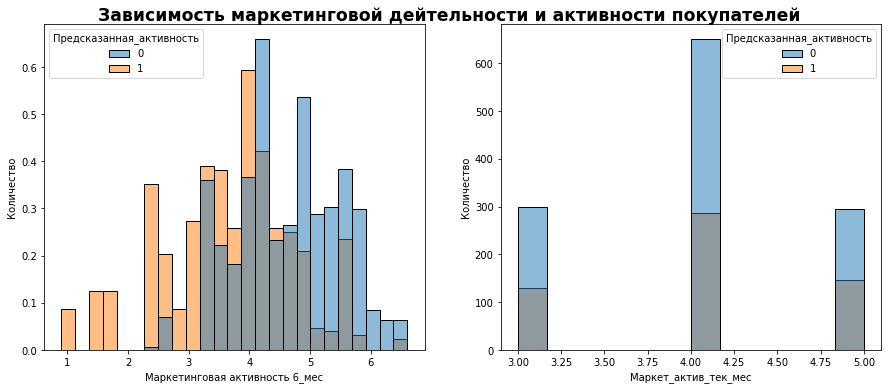

In [88]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (15,6))

sns.histplot(
    data = segment,
    x = 'Маркет_актив_6_мес',
    hue='Предсказанная_активность',
    stat='density',
    common_norm=False,
    ax = axs[0]
)

axs[0].set(xlabel = 'Маркетинговая активность 6_мес')
axs[0].set(ylabel = 'Количество')

sns.histplot(
    data = segment,
    x = 'Маркет_актив_тек_мес',
    hue= 'Предсказанная_активность',
    ax = axs[1]
)

axs[1].set(xlabel = 'Маркет_актив_тек_мес')
axs[1].set(ylabel = 'Количество')

fig.suptitle('Зависимость маркетинговой дейтельности и активности покупателей', fontsize = 'xx-large', fontweight = 600, y=0.92)
plt.show()

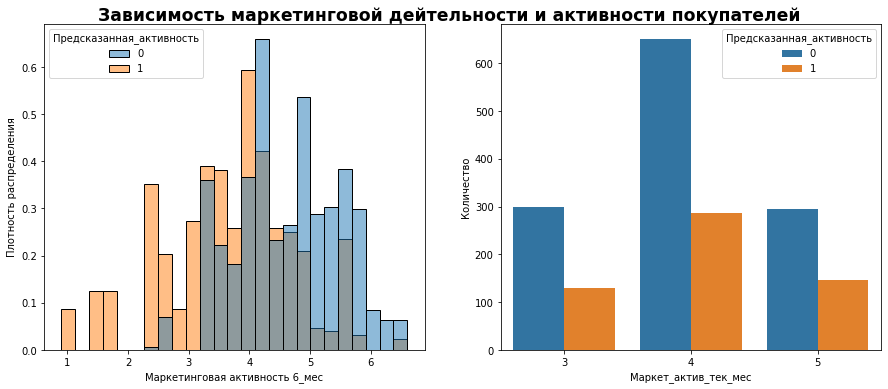

In [89]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (15,6))

sns.histplot(
    data = segment,
    x = 'Маркет_актив_6_мес',
    hue='Предсказанная_активность',
    stat='density',
    common_norm=False,
    ax = axs[0]
)

axs[0].set(xlabel = 'Маркетинговая активность 6_мес')
axs[0].set(ylabel = 'Плотность распределения')

sns.countplot(
    data = segment,
    x = 'Маркет_актив_тек_мес',
    hue= 'Предсказанная_активность',
    ax = axs[1]
)

axs[1].set(xlabel = 'Маркет_актив_тек_мес')
axs[1].set(ylabel = 'Количество')

fig.suptitle('Зависимость маркетинговой дейтельности и активности покупателей', fontsize = 'xx-large', fontweight = 600, y=0.92)
plt.show()

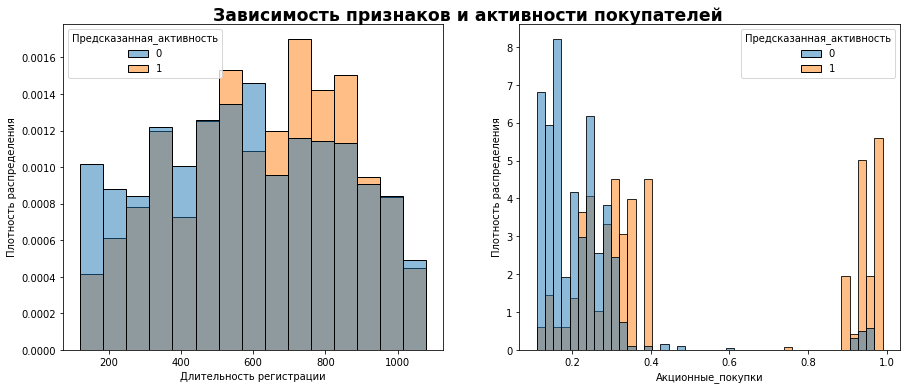

In [90]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (15,6))

sns.histplot(
    data = segment,
    x = 'Длительность',
    hue='Предсказанная_активность',
    stat='density',
    common_norm=False,
    ax = axs[0]
)

axs[0].set(xlabel = 'Длительность регистрации')
axs[0].set(ylabel = 'Плотность распределения')

sns.histplot(
    data = segment,
    x = 'Акционные_покупки',
    hue= 'Предсказанная_активность',
    stat='density',
    common_norm=False,
    ax = axs[1]
)

axs[1].set(xlabel = 'Акционные_покупки')
axs[1].set(ylabel = 'Плотность распределения')

fig.suptitle('Зависимость признаков и активности покупателей', fontsize = 'xx-large', fontweight = 600, y=0.92)
plt.show()

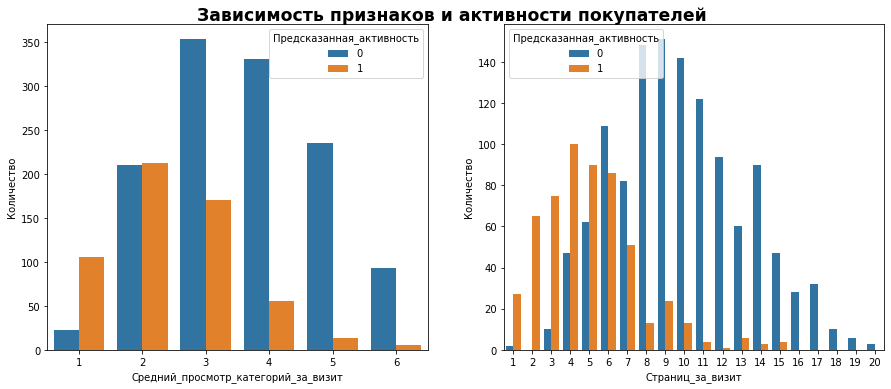

In [91]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (15,6))

sns.countplot(
    data = segment,
    x = 'Средний_просмотр_категорий_за_визит',
    hue='Предсказанная_активность',
    ax = axs[0]
)

axs[0].set(xlabel = 'Средний_просмотр_категорий_за_визит')
axs[0].set(ylabel = 'Количество')

sns.countplot(
    data = segment,
    x = 'Страниц_за_визит',
    hue= 'Предсказанная_активность',
    ax = axs[1]
)

axs[1].set(xlabel = 'Страниц_за_визит')
axs[1].set(ylabel = 'Количество')

fig.suptitle('Зависимость признаков и активности покупателей', fontsize = 'xx-large', fontweight = 600, y=0.92)
plt.show()

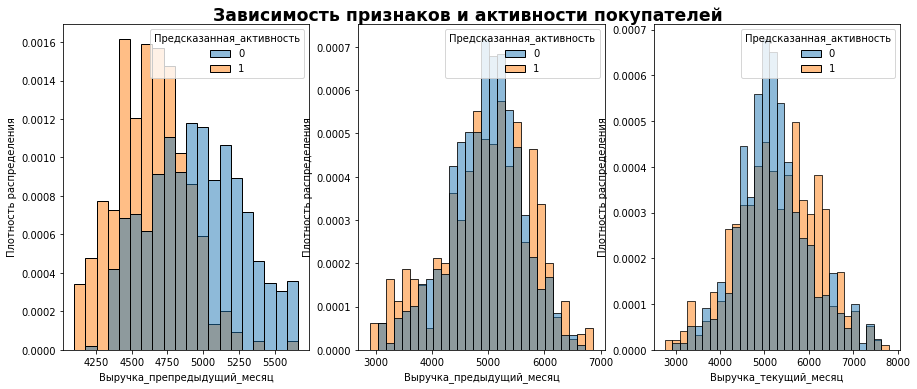

In [92]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (15,6))

sns.histplot(
    data = segment,
    x = 'Выручка_препредыдущий_месяц',
    hue='Предсказанная_активность',
    stat='density',
    common_norm=False,
    ax = axs[0]
)

axs[0].set(xlabel = 'Выручка_препредыдущий_месяц')
axs[0].set(ylabel = 'Плотность распределения')

sns.histplot(
    data = segment,
    x = 'Выручка_предыдущий_месяц',
    hue= 'Предсказанная_активность',
    stat='density',
    common_norm=False,
    ax = axs[1]
)

axs[1].set(xlabel = 'Выручка_предыдущий_месяц')
axs[1].set(ylabel = 'Плотность распределения')

sns.histplot(
    data = segment,
    x = 'Выручка_текущий_месяц',
    hue= 'Предсказанная_активность',
    stat='density',
    common_norm=False,
    ax = axs[2]
)

axs[2].set(xlabel = 'Выручка_текущий_месяц')
axs[2].set(ylabel = 'Плотность распределения')



fig.suptitle('Зависимость признаков и активности покупателей', fontsize = 'xx-large', fontweight = 600, y=0.92)
plt.show()

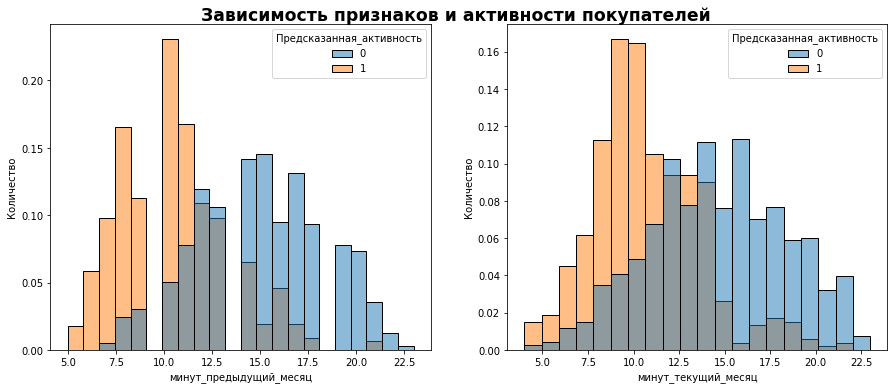

In [93]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (15,6))

sns.histplot(
    data = segment,
    x = 'минут_предыдущий_месяц',
    hue='Предсказанная_активность',
    stat='density',
    common_norm=False,
    ax = axs[0]
)

axs[0].set(xlabel = 'минут_предыдущий_месяц')
axs[0].set(ylabel = 'Количество')

sns.histplot(
    data = segment,
    x = 'минут_текущий_месяц',
    hue= 'Предсказанная_активность',
    stat='density',
    common_norm=False,
    ax = axs[1]
)

axs[1].set(xlabel = 'минут_текущий_месяц')
axs[1].set(ylabel = 'Количество')

fig.suptitle('Зависимость признаков и активности покупателей', fontsize = 'xx-large', fontweight = 600, y=0.92)
plt.show()

**ВЫВОД:**

В результате сравнения признаков по двум сегментам покупателей (с прежней активностью и со снижением активности), было выявлено, что снижение активности происходит у клиентов, которые меньше времени проводят на сайте, меньше просматривают категорий, страниц, так же имеют больше неоплаченных товаров в корзине. Кроме того, уровень маркетинговой активности в отношении таких покупателей ниже. 

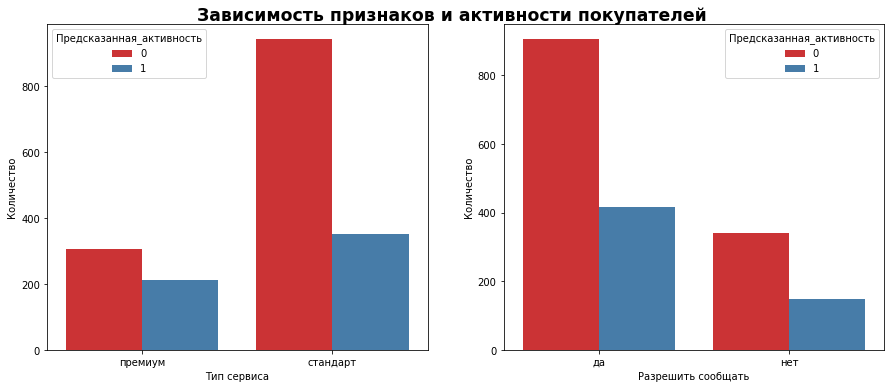

In [94]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (15,6))

sns.countplot(
    data = segment,
    x = 'Тип сервиса',
    hue='Предсказанная_активность',
    palette='Set1',
    ax = axs[0]
)

axs[0].set(xlabel = 'Тип сервиса')
axs[0].set(ylabel = 'Количество')

sns.countplot(
    data = segment,
    x = 'Разрешить сообщать',
    hue='Предсказанная_активность',
    palette='Set1',
    ax = axs[1]
)

axs[1].set(xlabel = 'Разрешить сообщать')
axs[1].set(ylabel = 'Количество')


fig.suptitle('Зависимость признаков и активности покупателей', fontsize = 'xx-large', fontweight = 600, y=0.92)
plt.show()

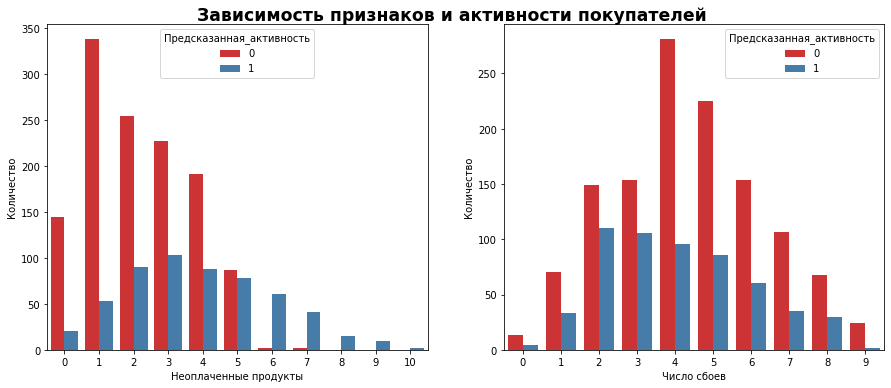

In [95]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (15,6))

sns.countplot(
    data = segment,
    x = 'Неоплаченные_продукты_штук_квартал',
    hue='Предсказанная_активность',
    palette='Set1',
    ax = axs[0]
)

axs[0].set(xlabel = 'Неоплаченные продукты')
axs[0].set(ylabel = 'Количество')

sns.countplot(
    data = segment,
    x = 'Ошибка_сервиса',
    hue='Предсказанная_активность',
    palette='Set1',
    ax = axs[1]
)

axs[1].set(xlabel = 'Число сбоев')
axs[1].set(ylabel = 'Количество')


fig.suptitle('Зависимость признаков и активности покупателей', fontsize = 'xx-large', fontweight = 600, y=0.92)
plt.show()

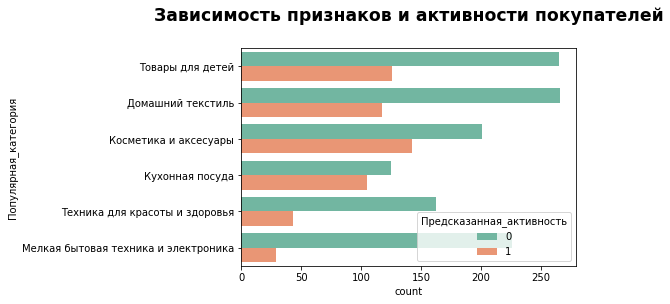

In [96]:
sns.countplot(
    data = segment,
    y = 'Популярная_категория',
    hue='Предсказанная_активность',
    orient='h',
    palette='Set2',
)

plt.title('Зависимость признаков и активности покупателей', fontsize = 'xx-large', fontweight = 800, y=1.1)
plt.show()

**ВЫВОД:**

Популярные категории среди покупателей с высокой вероятностью снижения активности: "Товаря для детей", "Домашний текстиль", наименее популярны: "Мелкая бытовая техника", Техника для красоты и здоровья".
По типу сервиса и признаку "Разрешить сообщить" существенных отличий не наблюдается.

ПРЕДЛОЖЕНИЯ:
- увеличить маркетинговую активность по сегменту пс риском снижения покупательской активности;
- увеличить количество просмотренных страниц магазина добавив блоки с категориями "Мелкая бытовая техника", Техника для красоты и здоровья".

## Общий вывод

*ВЫВОД ПО ПРЕДОБРАБОТКЕ ДАННЫХ:*


- Пропусков нет;

- Типы данных в столбцах указаны корректно;

- Названия столбцов оставлены кириллическими;

- Проведена проверка на явные дубликаты: 

      Явные дубликаты отсутствуют

- Проведена проверка на неявные дубликаты:  

      Неявные дубликаты в столбце Тип сервиса (market_file) исправлены
      В столбце Период (market_time) опечатка исправлена
  


*ВЫВОД ПО ИССЛЕДОВАТЕЛЬСКОМУ АНАЛИЗУ ДАННЫХ:*

Данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении (market_file):
- Маркетинговая активность компании за 6 месяцев на уровне 3.7 - 4.9. Медианное значение 4.2. Есть 4 выброса. Но это не аномальные значения. Оставим их в датафрейме.
- Маркетинговая активность компании за текущий месяц - 4.0. Выбросов нет.
- Количество дней с момента регистрации на сайте на уровне 410 - 806. Медианное значение 607. Выбросов нет.
- Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев на уровне 0.17 - 0.30. Медианное значение 0.24. Выбросы есть. Однако, это могут быть покупатели, которых интересовал исключительно акционный товар.
- Количество просмотренных покупателем категорий за визит в течение последнего месяца 2 - 4. Медианное значение 3. Выбросов нет.
- Общее число неоплаченных товаров в корзине за последние 3 месяца 1 - 3. Медианное значение 3. Есть 2 выброса. Оставим без изменений.
- Число сбоев, которые коснулись покупателя во время посещения сайта на уровне 3 - 6. Медианное значение 4. Выбросов нет.
- Среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца 5 - 11. Медианное значение 8. Выбросов нет.


- Покупательская активность снизилась у 38.2% клиентов.
- Тип сервиса: стандарт 71.1 %, премиум 28.9 %.
- Согласие на получение информации о дополнительных предложениях о товарах дали 73,9% покупателей.
- Наиболее популярные категории - детские товары (25.4%), домашний текстиль (19.3%). Наименее популярна - кухонная посуда (10.6%)

Данные о выручке, которую получает магазин с покупателя (market_money):
- Выручка, которую получает магазин с покупателя на уровне 4592 - 5363. Медианное значение 4959. Обнаружено аномально высокое значение 106862.2. Выброс удален.
- Выручка в течение 3 месяцев зафиксирована в равных долях (33.3%).

Данные о времени (в минутах), которое покупатель провёл на сайте в течение периода (market_time):
- Время, которое покупательпровел на сайте 10 - 16 минут. Медианное значение 13. Выбросов нет.
- Время в текущем и предыдущем периодах распределено в равных долях (50%).

Данные о среднемесячной прибыли покупателя за последние 3 месяца (money)
- Среднемесячная прибыль от покупателя 3.3 - 4.67. Медианное значение 4.04. 

*ВЫВОД ПО ОБЪЕДИЕНИЮ ДАННЫХ:*
- Объедили таблицы market_file, market_money, market_time. В итоговой таблице сделали отдельные столбцы для каждого периода, с учетом того, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов.

*ВЫВОД ПО КОРРЕЛЯЦИОННОМУ АНАЛИЗУ ДАННЫХ:*
- Мультиколлинеарность между входными признаками не наблюдается, т.к. значения коэффициента корреляции от 0.9 до 0.95 по модулю отсутствуют.

*ВЫВОД ПО ИСПОЛЬЗОВАНИЮ ПАЙПЛАЙНОВ:*
- Лучшая модель LogisticRegression 
- Метрика ROC-AUC 0,90

*ВЫВОД ПО АНАЛИЗУ ВАЖНОСТИ ПРИЗНАКОВ:*
- Признаки "Маркет_актив_тек_мес", "Тип сервиса", "Разрешить сообщать" мало значимы для модели;
- Признаки "минут_предыдущий_месяц", "Средний_просмотр_категорий_за_визит", "Страниц_за_визит" сильнее всего влияют на целевой признак;
- Эти наблюдения можно использовать при моделировании и принятии бизнес-решений: увеличить количество просмотренных страниц магазина добавив блоки «Похожие товары» и «С этим товаром также покупают», добавить блоки с популярными товарами, стимулировать переходы на другие страницы, использовать контекстную рекламу, проводить акции, розыгрыши и конкурсы.

*ВЫВОД ПО СЕГМЕНТАЦИИ ПОКУПАТЕЛЕЙ:*

- Популярные категории среди покупателей с высокой вероятностью снижения активности: "Товаря для детей", "Домашний текстиль";
- Наименее популярны: "Мелкая бытовая техника", Техника для красоты и здоровья";
- По типу сервиса и признаку "Разрешить сообщить" существенных отличий не наблюдается.


ПРЕДЛОЖЕНИЯ:
- увеличить маркетинговую активность приработе с сегментом покупателей с риском снижения активности;
- увеличить количество просмотренных страниц магазина добавив блоки с категориями "Мелкая бытовая техника", Техника для красоты и здоровья";
- информировать клиентов о собранной корзине.